In [1]:
import pandas as pd

df = pd.read_csv('/content/StudentsPerformance.csv')
print(df.head())
print(df.info())
print(df.describe())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

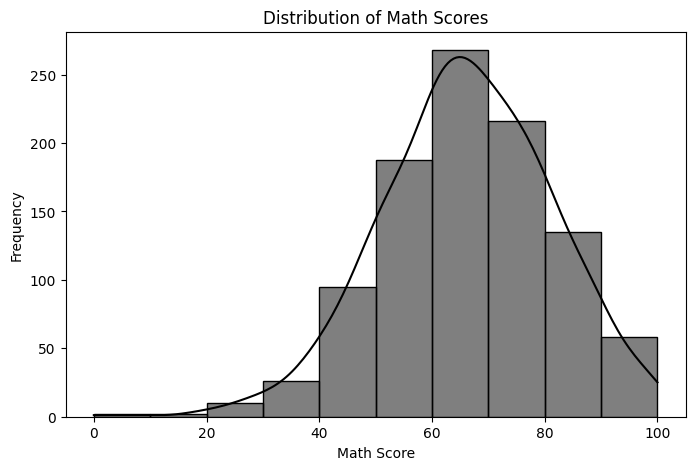

In [5]:
# Histogram


import matplotlib.pyplot as plt
import seaborn as sns

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

if "math_score" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["math_score"], bins=10, kde=True, color="black")
    plt.xlabel("Math Score")
    plt.ylabel("Frequency")
    plt.title("Distribution of Math Scores")
    plt.show()
else:
    print("Column 'math_score' not found. Available columns:", df.columns)

<ipython-input-8-08068dae0923>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["gender"], y=df["math_score"], palette="coolwarm")


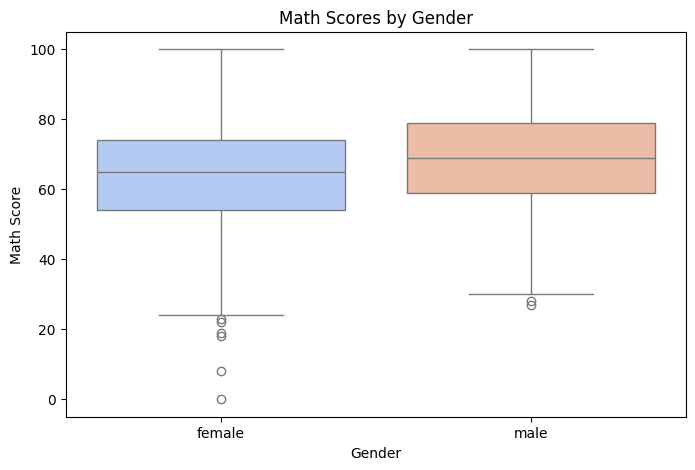

In [8]:

# boxplot


plt.figure(figsize=(8,5))
sns.boxplot(x=df["gender"], y=df["math_score"], palette="coolwarm")
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.title("Math Scores by Gender")
plt.show()


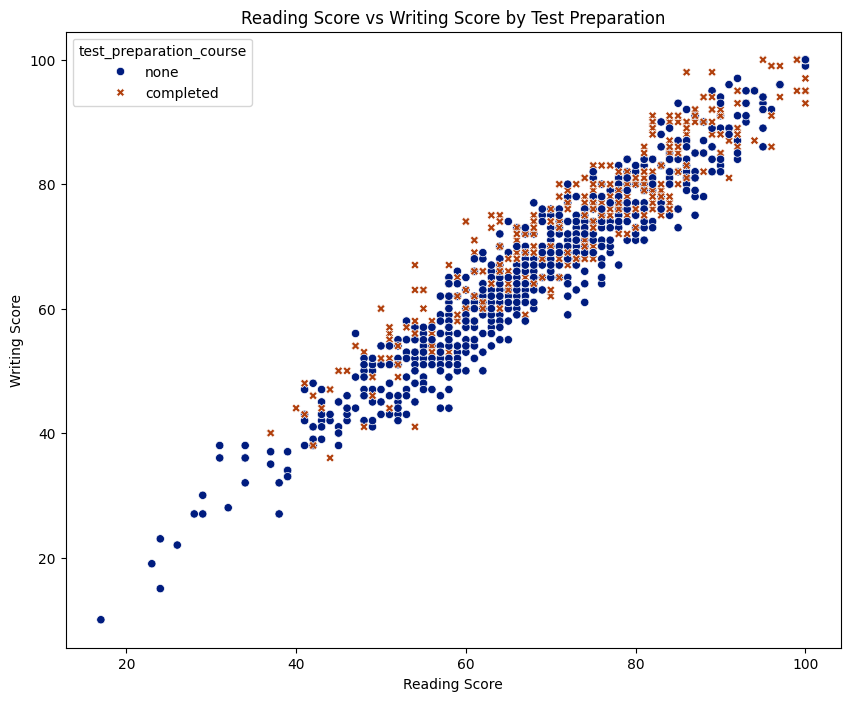

In [11]:
# scatterplot reading score vs writing score

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df["reading_score"], y=df["writing_score"],
                hue=df["test_preparation_course"], style=df["test_preparation_course"], palette="dark")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.title("Reading Score vs Writing Score by Test Preparation")
plt.show()


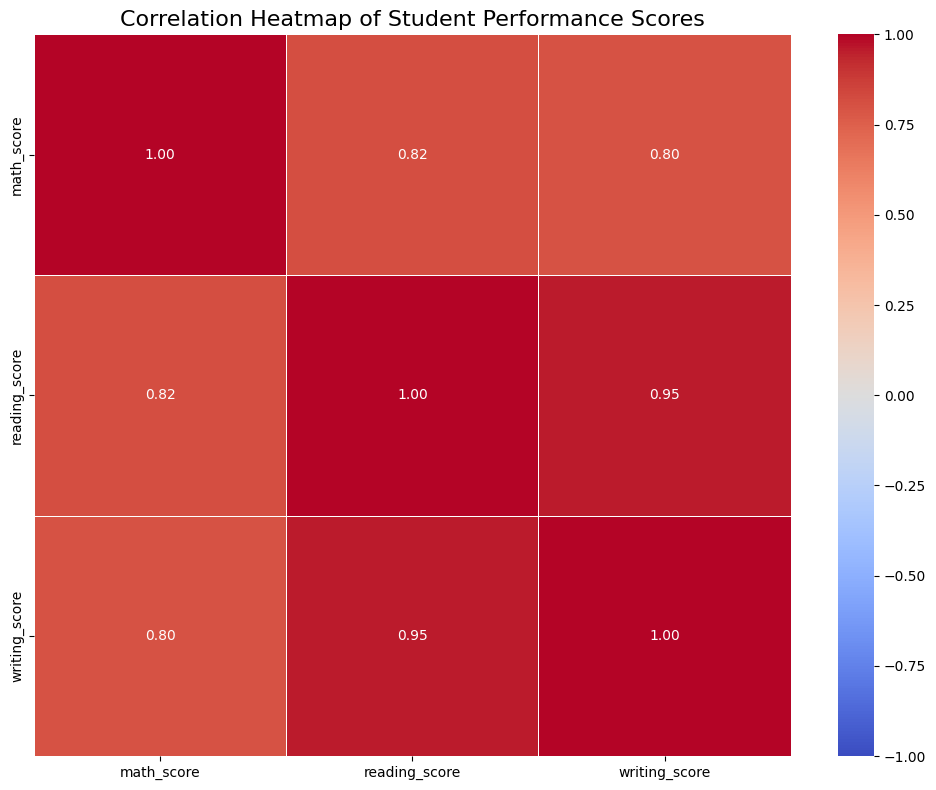

In [12]:
# 4.correlation heatmap

# Calculate correlation matrix
corr_matrix = df[['math_score', 'reading_score', 'writing_score']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Student Performance Scores', fontsize=16)
plt.tight_layout()
plt.show()


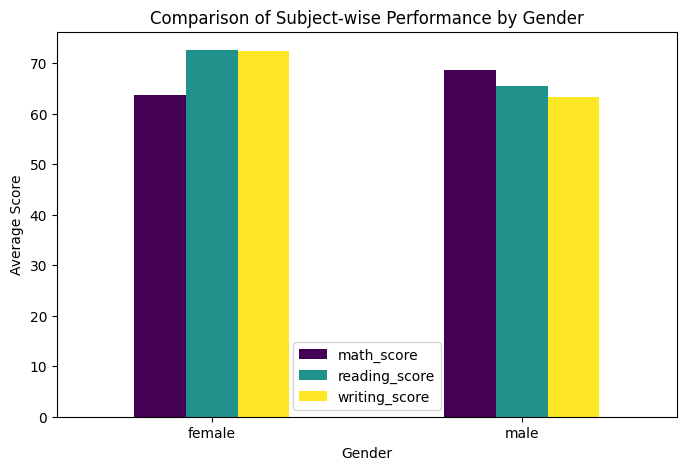

In [13]:

# barchart score comparission

df_mean_scores = df.groupby("gender")[["math_score", "reading_score", "writing_score"]].mean()

df_mean_scores.plot(kind="bar", figsize=(8,5), colormap="viridis")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.title("Comparison of Subject-wise Performance by Gender")
plt.xticks(rotation=0)
plt.show()